In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data_dir = "/content/archive.zip"
csv_files = []

In [3]:
# Walk through all folders to find possible CSV files
for root, dirs, files in os.walk(data_dir):
    for f in files:
        if f.endswith(".csv"):
            csv_files.append(os.path.join(root, f))

In [4]:
import os

# Show everything inside the extracted folder
for root, dirs, files in os.walk("/mnt/data/movies"):
    print("📂 Folder:", root)
    for f in files:
        print("   -", f)



In [5]:
# Extract the zip file
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall("/mnt/data/movies") # Extract to a new directory

In [6]:
# Define the path to the training data file
train_data_path = "/mnt/data/movies/Genre Classification Dataset/train_data.txt"

# Load the training data
df = pd.read_csv(train_data_path, sep=':::', header=None, names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python', encoding='utf-8')


print("\nDataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())
print("\nColumns available:", list(df.columns))


Dataset Shape: (54214, 4)

First few rows:


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...



Columns available: ['ID', 'TITLE', 'GENRE', 'DESCRIPTION']


In [9]:
text_column = "DESCRIPTION"
target_column = "GENRE"

In [10]:
print(f"\nUsing '{text_column}' as text and '{target_column}' as labels.")




Using 'DESCRIPTION' as text and 'GENRE' as labels.


In [11]:
df = df.dropna(subset=[text_column, target_column])
df[text_column] = df[text_column].astype(str)
df[target_column] = df[target_column].astype(str)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df[text_column], df[target_column], test_size=0.2, random_state=42
)

In [13]:
# --- Step 5: Vectorize ---
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


Training Naive Bayes...

=== Naive Bayes Results ===
Accuracy: 0.5231946878170248


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

      action        0.58      0.08      0.14       263
       adult        0.88      0.06      0.12       112
   adventure        0.29      0.03      0.05       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.44      0.47      1443
       crime        0.00      0.00      0.00       107
 documentary        0.58      0.88      0.70      2659
       drama        0.46      0.83      0.59      2697
      family        1.00      0.01      0.01       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.15      0.26        40
     history        0.00      0.00      0.00        45
      horror        0.73      0.36      0.48       431
       music        0.77      0.12      0.20       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

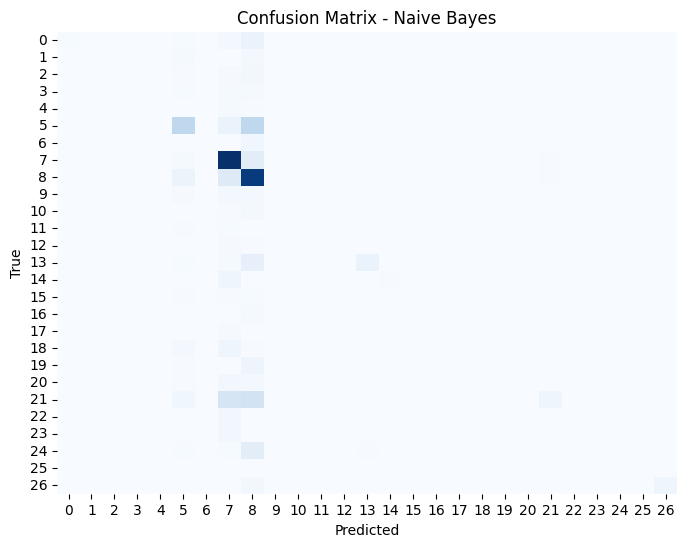


Training Logistic Regression...

=== Logistic Regression Results ===
Accuracy: 0.5794521811306834
               precision    recall  f1-score   support

      action        0.53      0.27      0.35       263
       adult        0.71      0.21      0.33       112
   adventure        0.41      0.14      0.21       139
   animation        0.61      0.11      0.18       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.58      0.55      1443
       crime        0.43      0.03      0.05       107
 documentary        0.66      0.85      0.74      2659
       drama        0.54      0.78      0.64      2697
      family        0.41      0.07      0.12       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.94      0.42      0.59        40
     history        0.00      0.00      0.00        45
      horror        0.63      0.56      0.59       431
       music        0.62      0.47      0.54       144
     musical        

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


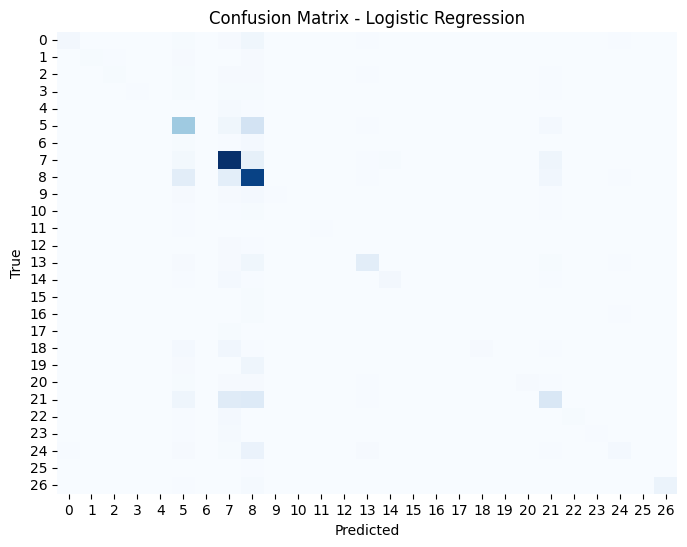


Training SVM...

=== SVM Results ===
Accuracy: 0.5704140920409481
               precision    recall  f1-score   support

      action        0.43      0.32      0.37       263
       adult        0.59      0.41      0.48       112
   adventure        0.31      0.22      0.25       139
   animation        0.35      0.18      0.24       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.56      0.54      1443
       crime        0.21      0.07      0.10       107
 documentary        0.69      0.81      0.74      2659
       drama        0.56      0.71      0.63      2697
      family        0.26      0.13      0.17       150
     fantasy        0.08      0.01      0.02        74
   game-show        0.79      0.68      0.73        40
     history        0.00      0.00      0.00        45
      horror        0.60      0.63      0.62       431
       music        0.56      0.54      0.55       144
     musical        0.00      0.00      0.00        

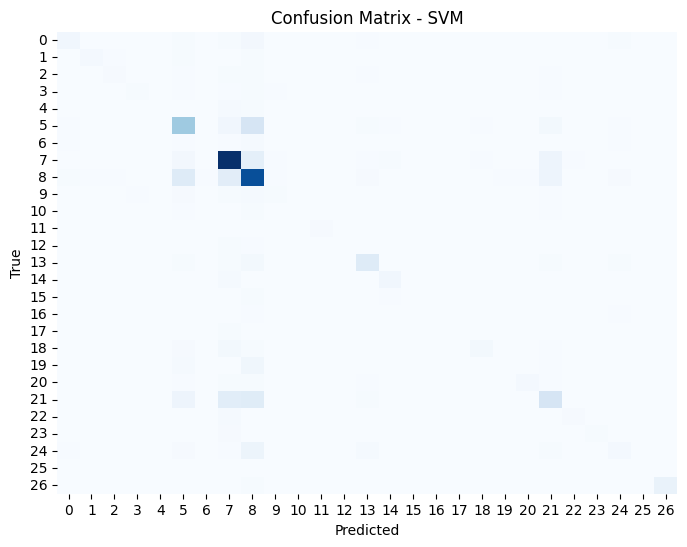

In [14]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=300),
    "SVM": LinearSVC()
}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_test_tfidf)

    print(f"\n=== {name} Results ===")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()



In [18]:
example_plot = "a modern adaption of the indian epic ramayan which follows the excited prince raghavs journey to rescue his wife janaki from the demon king lankesh"
vectorized = tfidf.transform([example_plot])
predicted_genre = models["Logistic Regression"].predict(vectorized)[0]

print(f"The predicted genre for the example plot is: {predicted_genre}")

The predicted genre for the example plot is:  comedy 


In [19]:

print("\nExample Plot:", example_plot)
print("Predicted Genre:", predicted_genre)


Example Plot: a modern adaption of the indian epic ramayan which follows the excited prince raghavs journey to rescue his wife janaki from the demon king lankesh
Predicted Genre:  comedy 
